In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import EarlyStopping
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# train = pd.read_csv('train.csv')
# features = [c for c in train.columns if c != 'label']
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train[features].values, train.label.values, test_size=0.33, random_state=seed)
# X_train = X_train.reshape(X_train.shape[0], 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 28, 28)

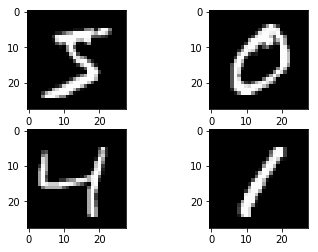

In [4]:
# load (downloaded if needed) the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray')) 
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') 
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), 
                     input_shape=(1, 28, 28), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [8]:
early_stopping_monitor = EarlyStopping(monitor='val_acc', patience=5, verbose=1)
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=50, batch_size=200, 
          callbacks=[early_stopping_monitor], verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 140s 2ms/step - loss: 0.3964 - acc: 0.8780 - val_loss: 0.1005 - val_acc: 0.9684
Epoch 2/50
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0951 - acc: 0.9708 - val_loss: 0.0594 - val_acc: 0.9805
Epoch 3/50
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0689 - acc: 0.9787 - val_loss: 0.0373 - val_acc: 0.9888
Epoch 4/50
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0565 - acc: 0.9825 - val_loss: 0.0331 - val_acc: 0.9893
Epoch 5/50
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0477 - acc: 0.9849 - val_loss: 0.0307 - val_acc: 0.9891
Epoch 6/50
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0431 - acc: 0.9863 - val_loss: 0.0271 - val_acc: 0.9909
Epoch 7/50
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0383 - acc: 0.9876 - val_loss: 0.0267 - 

In [9]:
test_temp = pd.read_csv('test.csv')

In [10]:
test = test_temp.values.reshape(test_temp.values.shape[0], 28, 28)
test = test.reshape(test.shape[0], 1, 28, 28).astype('float32')
test = test / 255

In [11]:
pred_class = model.predict_classes(test)

In [12]:
submission = pd.DataFrame(data=np.column_stack((test_temp.index.values+1,pred_class)), 
                          columns=['ImageId', 'Label'])

In [13]:
submission.to_csv('submission.csv', index=False)